### CSCE 633 Machine Learning : Homework 2 
#### Name : Sherine Davis Kozhikadan, UIN : 629009750

In [17]:
# All imports come here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import defaultdict
import matplotlib.patches as mpatches

In [18]:
data = pd.read_csv("hw2_data.csv")
print("Rows : {}, Columns : {}".format(data.shape[0], data.shape[1]))
print("Column Names : \n{}".format("\n".join(list(data.columns))))

numericalAttributes = list(x for x in data.columns if x not in ['primary_strength', 'combat_point', 'name'])
categoricalAttributes = ['primary_strength']
columnLabels = {
    'stamina' : 'Stamina',
    'attack_value' : 'Attack Value',
    'defense_value' : 'Defense Value',
    'capture_rate' : 'Capture Rate',
    'flee_rate' : 'Flee Rate',
    'spawn_chance' : 'Spawn Chance',
    'primary_strength' : 'Primary Strength',
    'combat_point' : 'Combat Point'
}

Rows : 146, Columns : 9
Column Names : 
name
stamina
attack_value
defense_value
capture_rate
flee_rate
spawn_chance
primary_strength
combat_point


**Question 2: Machine learning with Pokemon GO**
<br>
Recent studies have found that novel mobile games can lead to increased physical activity. A
notable example is Pokemon Go, a mobile game combining the Pokemon world through aug-
mented reality with the real world requiring players to physically move around. Specifically,
in the following study, researchers have found that Pokemon Go leads to increased levels of
physical activity for the most engaged players!
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5174727/

Inside the "\Homework 2" folder on CANVAS you will find the data file (named "\hw2 data.csv")
that will be used for our experiments. The rows of these files refer to the data samples (i.e.,
pokemon samples), while the columns denote the name of the pokemon (column 1), its attributes
(columns 2-8), and the combat point outcome (column 9). You can ignore column 1 for the rest
of this problem.

In this problem, our goal is to predict the combat points of each pokemon in the 2017 Pokemon
Go mobile game. Each pokemon has its own unique attributes that can help predicting its
combat points. These include:
1. Stamina
2. Attack value
3. Defense value
4. Capture rate
5. Flee rate
6. Spawn chance
7. Primary strength

**(i) (0.5 point) Data exploration:** Which are categorical and which are numerical attributes
(columns 2-8) of this dataset?

**Ans.** Among the given attributes **primary_strength** is the only categorical attribute. All the remaining attributes i.e. **stamina**, **attack_value**, **defense_value**, **capture_rate**, **flee_rate**, **spawn_chance** are numerical.

**(ii) (0.5 point) Data exploration:** Plot 2-D scatter plots and compute the Pearson's correlation coefficient between the numerical attributes and the outcome of interest. Which attributes would be the most predictive of the outcome of combat points?
**Note:** The Pearson's correlation coefficient is a measure of linear association between two variables. It ranges between -1 and 1, with values closer to 1 indicating high degree of association between a feature and the outcome. For more details, see this link: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient. You can use any available library to compute
this metric.

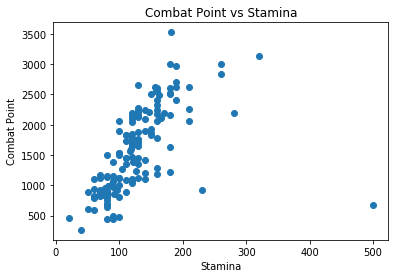

Pearson's correlation coefficient between Stamina & Combat Point is 0.5828317032229263


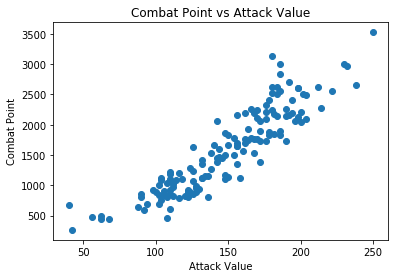

Pearson's correlation coefficient between Attack Value & Combat Point is 0.9075315401042737


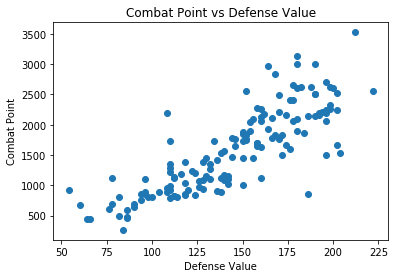

Pearson's correlation coefficient between Defense Value & Combat Point is 0.8262293053572933


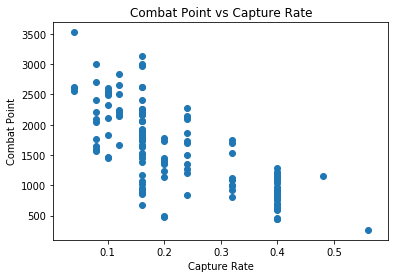

Pearson's correlation coefficient between Capture Rate & Combat Point is -0.7430078083529396


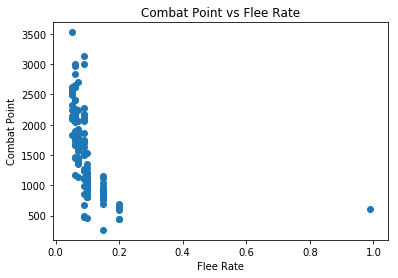

Pearson's correlation coefficient between Flee Rate & Combat Point is -0.4070342114215964


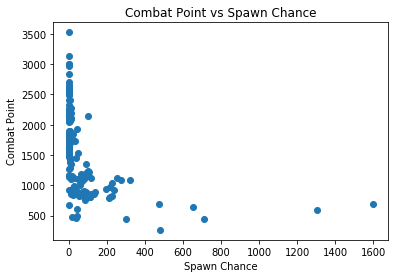

Pearson's correlation coefficient between Spawn Chance & Combat Point is -0.42132699465983614


In [19]:
for col in numericalAttributes:
    
    y = 'combat_point'
    x = col
    
    plt.scatter(x=data[x], y=data[y])
    plt.title('{} vs {}'.format(columnLabels[y], columnLabels[x]))
    plt.xlabel(columnLabels[x])
    plt.ylabel(columnLabels[y])
    plt.show()
    
    corr = data.loc[:, [x, y]].corr(method="pearson").iloc[0,1]
    print('Pearson\'s correlation coefficient between {} & {} is {}'.format(columnLabels[x], columnLabels[y], corr))
    


**Ans.** Pearson's correlation coefficient<br> 
Between **Stamina** and **Combat Point** is 0.5828317032229254<br>
Between **Attack Value** and **Combat Point** is 0.9075315401042732<br>
Between **Defense Value** and **Combat Point** is 0.8262293053572933<br>
Between **Capture Rate** and **Combat Point** is -0.7430078083529404<br>
Between **Flee Rate** and **Combat Point** is -0.40703421142159685<br>
Between **Spawn Chance** and **Combat Point** is -0.4213269946598361<br>
<br>
Comparing the collected coefficients, it can be seen that **Attack Value** & **Combat Point** have the highest correlation, so **Attack Value** will bethe most predictive of the outcome of **Combat Points**. 

**(iii) (0.5 point) Data exploration:** Plot 2-D scatter plots and compute the Pearson's correlation coefficient between the numerical attributes themselves. Which variables are the most
correlated to each other?

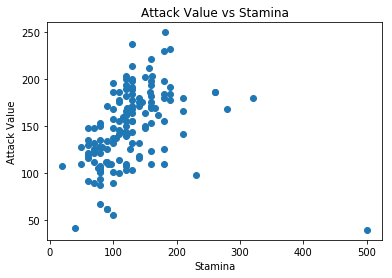

Pearson's correlation coefficient between Stamina & Attack Value is 0.30299498267389147


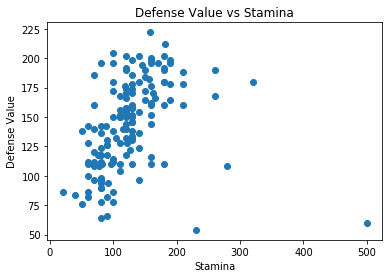

Pearson's correlation coefficient between Stamina & Defense Value is 0.3026633362536891


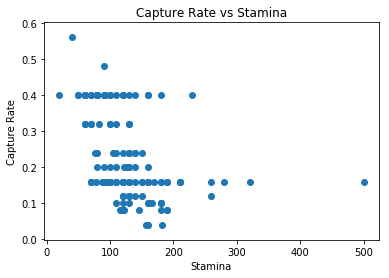

Pearson's correlation coefficient between Stamina & Capture Rate is -0.4468503047144601


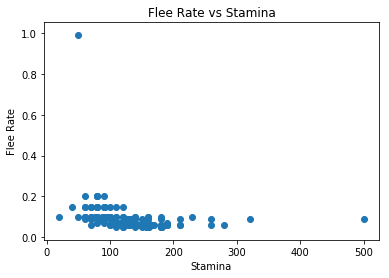

Pearson's correlation coefficient between Stamina & Flee Rate is -0.27104753932483916


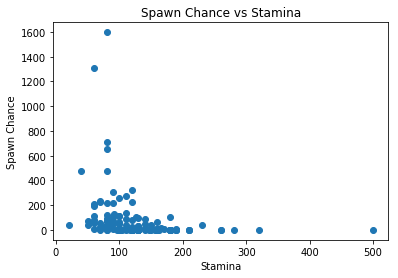

Pearson's correlation coefficient between Stamina & Spawn Chance is -0.2764202078836037


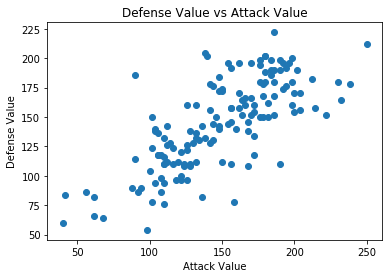

Pearson's correlation coefficient between Attack Value & Defense Value is 0.736776646751523


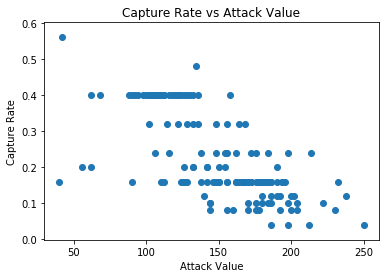

Pearson's correlation coefficient between Attack Value & Capture Rate is -0.6905726716022139


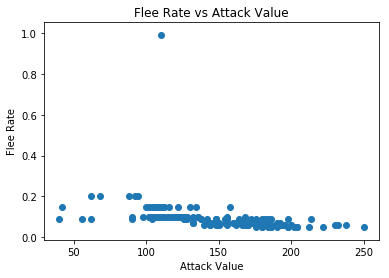

Pearson's correlation coefficient between Attack Value & Flee Rate is -0.36906414197600684


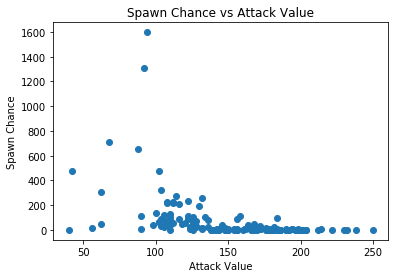

Pearson's correlation coefficient between Attack Value & Spawn Chance is -0.43264844020108695


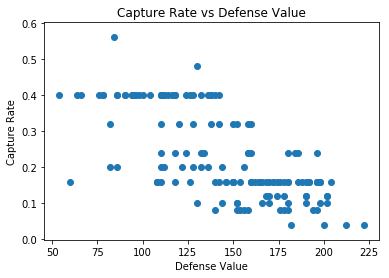

Pearson's correlation coefficient between Defense Value & Capture Rate is -0.6972657162131649


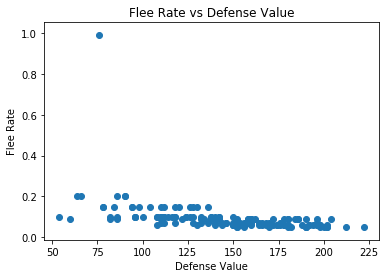

Pearson's correlation coefficient between Defense Value & Flee Rate is -0.4238597562372931


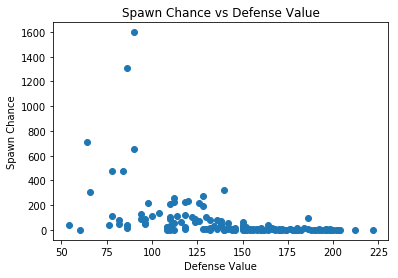

Pearson's correlation coefficient between Defense Value & Spawn Chance is -0.43249856208332005


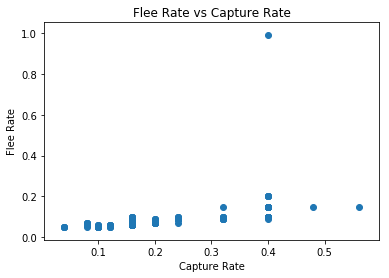

Pearson's correlation coefficient between Capture Rate & Flee Rate is 0.44051150728059496


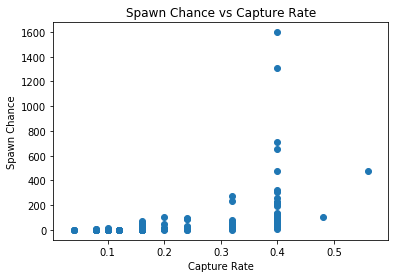

Pearson's correlation coefficient between Capture Rate & Spawn Chance is 0.47279272664456795


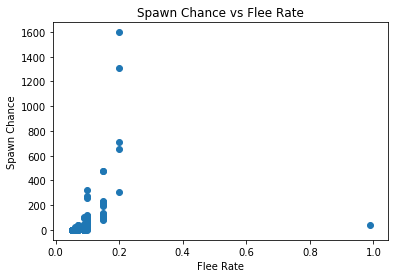

Pearson's correlation coefficient between Flee Rate & Spawn Chance is 0.29322169222082034


In [20]:
for i, x in enumerate(numericalAttributes[:-1]):
    for j, y in enumerate(numericalAttributes[i+1:]):
    
        plt.scatter(x=data[x], y=data[y])
        plt.title('{} vs {}'.format(columnLabels[y], columnLabels[x]))
        plt.xlabel(columnLabels[x])
        plt.ylabel(columnLabels[y])
        plt.show()

        corr = data.loc[:, [x, y]].corr(method="pearson").iloc[0,1]
        print('Pearson\'s correlation coefficient between {} & {} is {}'.format(columnLabels[x], columnLabels[y], corr))
        

**Ans.** Pearson's correlation coefficient <br>
Between **Stamina** and **Attack Value** is 0.30299498267389124 <br>
Between **Stamina** and **Defense Value** is 0.3026633362536893 <br>
Between **Stamina** and **Capture Rate** is -0.44685030471446 <br>
Between **Stamina** and **Flee Rate** is -0.2710475393248393 <br>
Between **Stamina** and **Spawn Chance** is -0.2764202078836037 <br>
Between **Attack Value** and **Defense Value** is 0.736776646751523 <br>
Between **Attack Value** and **Capture Rate** is -0.6905726716022135 <br>
Between **Attack Value** and **Flee Rate** is -0.369064141976007 <br>
Between **Attack Value** and **Spawn Chance** is -0.4326484402010866 <br>
Between **Defense Value** and **Capture Rate** is -0.6972657162131646 <br>
Between **Defense Value** and **Flee Rate** is -0.42385975623729294 <br>
Between **Defense Value** and **Spawn Chance** is -0.4324985620833204 <br>
Between **Capture Rate** and **Flee Rate** is 0.44051150728059607 <br>
Between **Capture Rate** and **Spawn Chance** is 0.4727927266445683 <br>
Between **Flee Rate** and **Spawn Chance** is 0.29322169222082034 <br>
<br>
Comparing the collected coefficients, it can be seen that **Attack Value** & **Defense Value** have the highest correlation.

**(iv) (1 point) Pre-processing of categorical variables:** Categorical variables require special attention because usually they cannot be the input of regression models as they are. Apotential way to treat categorical variables is to simply convert each value of the variable to
a separate number. However, this might impute non-existent relative associations between the values, which might not always be representative of the data (e.g., if we assign "1" to the value "green" and "2" to the value "red", the regression algorithm will assume that "red" is greater than "green", which is not necessarily the case). For this reason, we can use a one hot encoding to represent categorical variables. According to this, we will create a binary column for
each category of the categorical variable, which will take a value of 1 if the sample belongs to that category, and 0 otherwise. For each categorical variable of the problem, count the number of different values and **implement** the one hot encoding. For the remaining of the problem, you will be working with the one hot encoding of the categorical variables.

In [21]:
primaryStrengthCategories = list(data['primary_strength'].unique())
for col in primaryStrengthCategories:
    data[col] = data.apply(lambda x : 1 if x.primary_strength == col else 0, axis=1)

colsToShow = primaryStrengthCategories[:]
colsToShow.insert(0, 'primary_strength')
colsToShow.insert(0, 'name')
data.loc[data.index[:20], colsToShow]

,name,primary_strength,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,Bulbasaur,Grass,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ivysaur,Grass,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Venusaur,Grass,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Charmander,Fire,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Charmeleon,Fire,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Charizard,Fire,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Squirtle,Water,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,Wartortle,Water,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,Blastoise,Water,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,Caterpie,Bug,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**(v) (1.5 points) Predicting combat points:** The goal of this question is to predict the
combat points using the numerical attributes, as well as the categorical attributes that were
pre-processed with the one hot encoding process. Implement a linear regression model using
the ordinary least squares (OLS) solution. How many parameters does the model have? To
test your model, randomly split the data into 5 folds and use a 5-fold cross-validation. For each
fold compute the square root of the residual sum of squares error (RSS) between the actual and
predicted outcome variable. Also compute the average square roof of the RSS over all folds.

In [22]:
# parameters list
cols = numericalAttributes[:]
cols.extend(primaryStrengthCategories)

xDf = data.loc[:, cols]

xDf['bias'] = 1
cols.insert(0, 'bias')

# X data matrix as dataframe
xDf = xDf[cols]
X = xDf.to_numpy()

# Y matrix as dataframe
yDf = data.loc[:, 'combat_point']
Y = yDf.to_numpy()

In [25]:
# X[tranpose]*X
A = np.matmul(X.transpose(), X)
# (X[tranpose]*X)[inverse]
B = np.linalg.pinv(A)
# (X[tranpose]*X)[inverse]*X[transpose]
C = np.matmul(B, X.transpose())
# (X[tranpose]*X)[inverse]*X[transpose]*Y
W = np.matmul(C, Y)
# np.linalg.inv(np.matmul(X.transpose(), X))
W

array([-1.30356122e+03,  3.91582316e+00,  1.08123972e+01,  5.62796395e+00,
        6.80201099e+01,  2.31619487e+02,  2.01856548e-01, -9.10626648e+01,
       -9.22912956e+01, -5.30741369e+01, -6.82121706e-01, -1.05097057e+02,
       -5.45190296e+01, -1.43186644e+02, -6.87127917e+01, -9.11383362e+00,
       -9.10459295e+01, -1.62580904e+02, -1.29691570e+02, -1.66423408e+02,
       -1.35610833e+02, -4.69000109e-01])